# Project Statistical Learning

# Importing Required Libraries

In [55]:
##importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy.stats import skew #for skewness
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power ## to test the 2 sample means
from statsmodels.stats.proportion import proportions_ztest ##for proportion testing
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison    # For post-hoc Testing
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

# Reading the dataset and displaying the first 10 records of the dataset.

In [56]:
insurance_data = pd.read_csv('insurance.csv') ##reading the dataframe
insurance_data.head(10) ##showing the first 10 records from the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Checking the Shape and Type of the Data

In [57]:
rows=len(insurance_data)
columns = len(insurance_data.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
insurance_data.info() #Displays the type of the columns that exist in the dataset

The dataset contains 1338 rows and 7 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking the Presence of Null Values

In [58]:
print(insurance_data.isnull().sum().to_frame('nulls'))

          nulls
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0


This dataset has 4 numerical variables:
- Age; this takes positive integer values
- BMI (Body Mass Index) is continuous in nature
- Number of Children (this is a discrete variable, can only take poitive integers or 0); this can be considered as categorical as well
- Charges (Premium paid)

There are 3 categorical variables:
- Sex (indicates the gender)
- Smoker (binary flag to indicate whether a person smokes)
- Region (location of the person)

Interestingly, there is not a single column with nulls.


# Five Number Summary for the Numerical variables

In [59]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


On initial investigation, it seems that 
- Age is normally distributed as mean and median are close. Also, q1 and q3 values are equidistant from mean
- Similar observation can be made about the BMI and Children columns as well
- Distribution of Charges is right skewed as the mean is greater than median

Let's plot the distributions for these to confirm our observations.

# Distribution of Age, BMI and Charges

Text(0.5, 1.0, 'Frequency Distribution of Age')

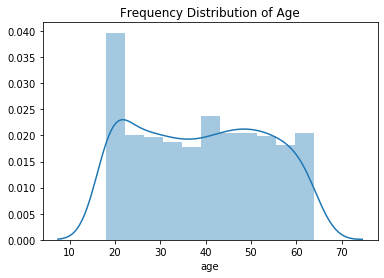

In [60]:
sns.distplot(insurance_data['age']).set_title('Frequency Distribution of Age')

Oops, Age does not follow normal distribution. In fact, it is more closer to being an uniform distribution.

Text(0.5, 1.0, 'Frequency Distribution of BMI')

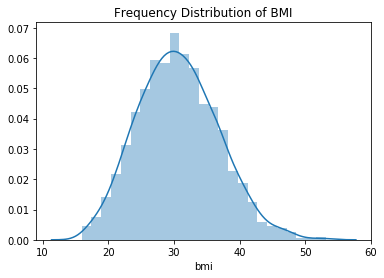

In [61]:
sns.distplot(insurance_data['bmi']).set_title('Frequency Distribution of BMI')

Yes, the frequency distribution is very close to being a bell shaped curve.

The distribution of charges is indeed right skewed.


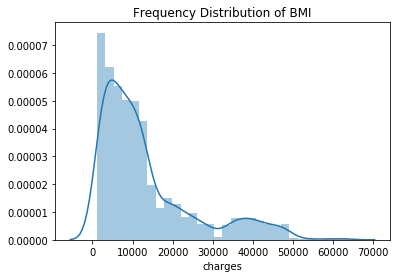

In [62]:
sns.distplot(insurance_data['charges']).set_title('Frequency Distribution of BMI')
print('The distribution of charges is indeed right skewed.')

# Measuring the Skewness of the Age, BMI and Charges

We will make use of skew() method from stats package.

According to Geeks for Geeks, skew() method calculates skewness as 
Skewness= 3(mean-median)/standard deviation

However, as per documentation of stats package, skew() method returns Fischer- Pearson coefficient of skewness.

In [63]:
bmi_skewness = skew(insurance_data['bmi'])
age_skewness = skew(insurance_data['age'])
charges_skewness = skew(insurance_data['charges'])

print('Skewness for distribution of BMI = %1.4f' %bmi_skewness)
print('\nSkewness for distribution of Age = %1.4f' %age_skewness)
print('\nSkewness for distribution of Charges = %1.4f'%charges_skewness )

Skewness for distribution of BMI = 0.2837

Skewness for distribution of Age = 0.0556

Skewness for distribution of Charges = 1.5142


# Checking the presence of Outliers using Boxplot

Looking at the box plot of bmi at gender level

Text(0.5, 1.0, 'Box Plot for BMI')

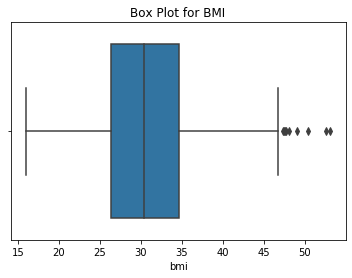

In [64]:
sns.boxplot(insurance_data['bmi']).set_title('Box Plot for BMI')

There are few outliers for BMI towards the right whisker.

Text(0.5, 1.0, 'Box Plot for Age')

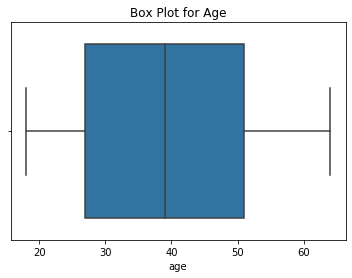

In [65]:
sns.boxplot(insurance_data['age']).set_title('Box Plot for Age')

No outliers seen as all the values lie within q1- 1.5*IQR and q3+1.5*IQR

Text(0.5, 1.0, 'Box Plot for Charges')

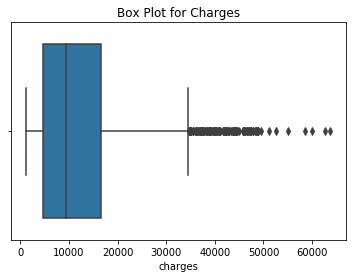

In [66]:
sns.boxplot(insurance_data['charges']).set_title('Box Plot for Charges')

Charges (Premium) has plenty of outliers towards the right side of the distribution.

Checking the number of observations that are outliers

In [67]:
q1=np.percentile(insurance_data['charges'], 25)
q3=np.percentile(insurance_data['charges'], 75)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Upper Limit %d'%upper_limit)
outliers=insurance_data[insurance_data['charges'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on charges = %d'%outlier_cnt)

IQR = 11899
Upper Limit 34489
No. of outliers based on charges = 139


# Checking the Distribution of Categorical Variables

Text(0.5, 1.0, 'Frequency Distribution by Gender')

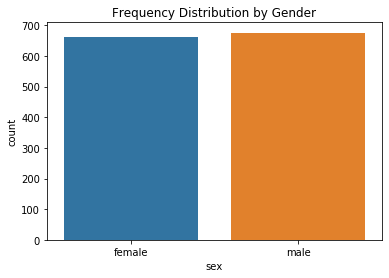

In [68]:
sns.countplot(insurance_data['sex']).set_title('Frequency Distribution by Gender')

In [69]:
print(insurance_data["sex"].describe().to_frame('Details_Gender'))

       Details_Gender
count            1338
unique              2
top              male
freq              676


There are roughly equal number of records for both male and females.

       Details_Smoker
count            1338
unique              2
top                no
freq             1064


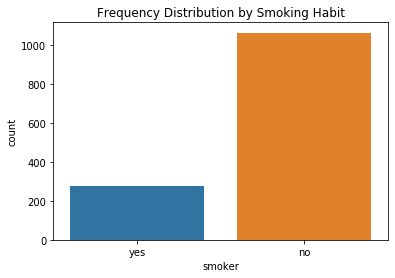

In [70]:
sns.countplot(insurance_data['smoker']).set_title('Frequency Distribution by Smoking Habit')
print(insurance_data["smoker"].describe().to_frame('Details_Smoker'))

       Details_Region
count            1338
unique              4
top         southeast
freq              364


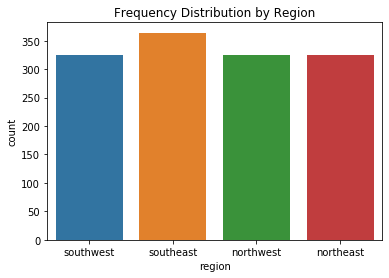

In [71]:
sns.countplot(insurance_data['region']).set_title('Frequency Distribution by Region')
print(insurance_data["region"].describe().to_frame('Details_Region'))

In [72]:
pd.crosstab(insurance_data['sex'],insurance_data['smoker']) #Checking the distribution of smokers and non-smokers across gender
##pd.crosstab(insurance_data['sex'],[insurance_data['smoker'],insurance_data['region']])

smoker,no,yes
sex,,
female,547,115
male,517,159


sex,female,male
children,,
0,289,285
1,158,166
2,119,121
3,77,80
4,11,14
5,8,10


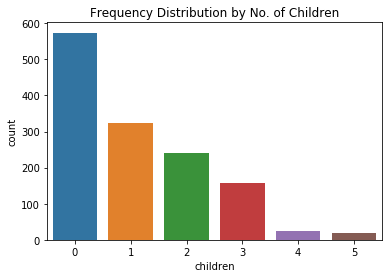

In [73]:
sns.countplot(insurance_data['children']).set_title('Frequency Distribution by No. of Children')
pd.crosstab(insurance_data['children'],insurance_data['sex'])

~40% of the data has no children.

# Pair Plots for Numerical Attributes to see their relationships

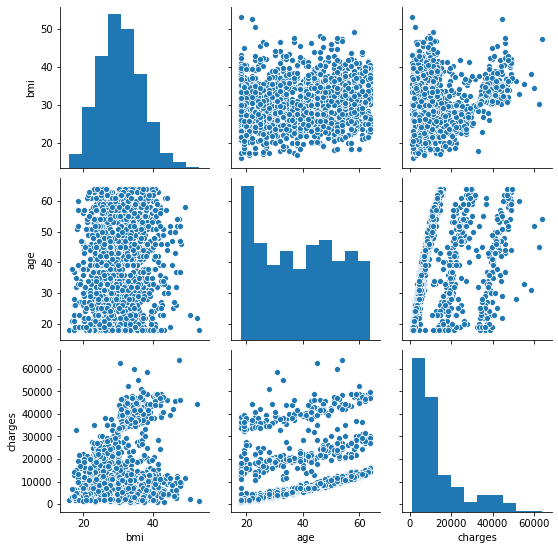

In [74]:
sns.pairplot(insurance_data[['bmi','age','charges']])

There is weak correlation between the attributes.

# Hypothesis Testing

# Question1 : Do charges of people who smoke differ significantly from the people who don't?

Null Hypothesis: Mean charges of Smoker = Mean Charges of Non-Smokers

Alternate Hypothesis: Mean Charges of Smoker <> Mean Charges of Non-Smokers

In [75]:
smoker_data= insurance_data[insurance_data['smoker']=='yes']
print(smoker_data)
smoker_charges=smoker_data['charges']
print(smoker_charges)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]
0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    2810

non_smoker_data= insurance_data[insurance_data['smoker']=='no']
print(non_smoker_data)
non_smoker_charges=non_smoker_data['charges']
print(non_smoker_charges)

In [76]:
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [77]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 8.271435842177219e-283


Since Null Hypothesis is False, we reject Null Hupothesis and infer that the charges do differ based on smoking habits.

# Does bmi of males differ significantly from that of females?

Null Hypothesis: Mean BMI of Males = Mean BMI of Females

Alternate Hypothesis: Mean BMI of males <> Mean BMI of Females

In [78]:
male_data= insurance_data[insurance_data['sex']=='male']
male_bmi=male_data['bmi']
print(len(male_bmi))

female_data= insurance_data[insurance_data['sex']=='female']
female_bmi=female_data['bmi']
print(len(female_bmi))

676
662


In [79]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


In [80]:
# p_value > 0.05 => NULL hypothesis:
# they have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08997637178984932


Since Null Hypothesis is True, we fail to reject Null Hupothesis and infer that the bmi does not differ across gender.

# Is the proportion of smokers significantly different in different genders?

Null Hypothesis = The proportions are equal

Alternate Hypothesis= The two proportions are not equal

In [81]:
female_smokers = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insurance_data.sex.value_counts()[1] # number of females in the data
n_males = insurance_data.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


In [82]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


We infer that the difference is significant and male has higher proportion of smokers.

# Is the distribution of bmi across women with no children, one child and two children, the same?

Null Hypothesis: The means of BMI is same across women with no children, one childrend and two children is same
   
   Mean1=Mean2=Mean3

Alternate Hypotheis: At least one of the groups has mean different than others

In [83]:
sample_data=insurance_data[(insurance_data["sex"]=="female") & (insurance_data["children"]<3)]

In [84]:
sample_data2= sample_data[['bmi','children']]
print(sample_data2)

        bmi  children
0     27.90         0
5     25.74         0
6     33.44         1
9     25.84         0
11    26.29         0
...     ...       ...
1331  33.40         0
1334  31.92         0
1335  36.85         0
1336  25.80         0
1337  29.07         0

[566 rows x 2 columns]


In [85]:
formula = 'bmi~C(children)'
model = ols(formula, sample_data2).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


As p_value (0.71) is greater than critical value at 95% significa , we fail to reject Null Hypothesis.
Hence, we infer that the bmi is not influenced by the number of children.